In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import numpy as np
import math as m
import statistics as st
import random
n=116
df = pd.read_csv('Выборка Блохина.csv', delimiter=';')
mean_y=89.0252463054187
mean_x=10.843043995243757
sy=2521.12197188201
sx=10.937331334332836
df

,pizzaPrice_rupiah,The diameter of pizza in inch
0,235.0,22.0
1,198.0,20.0
2,120.0,16.0
3,155.0,14.0
4,248.0,18.0
...,...,...
111,123.0,12.0
112,33.0,8.5
113,46.0,12.0
114,72.0,14.0


In [3]:
def normalize(df):
    X=[]
    for x,y in zip(df['The diameter of pizza in inch'],df['pizzaPrice_rupiah']):
        xi = (x-mean_x)/sx
        yi = (y-mean_y)/sy
        X.append([xi,yi])
    return X
X=normalize(df)
X

[[1.0200802795224821, 0.05790071060529118],
 [0.8372203168072723, 0.043224705075745294],
 [0.47150039137685235, 0.012286098824270187],
 [0.28864042866164236, 0.026168806757624404],
 [0.6543603540920623, 0.06305714498053704],
 [0.7000753447708647, 0.02021907478618688],
 [0.47150039137685235, 0.00831961084331184],
 [-0.25993945948398756, -0.007546341080521549],
 [0.10578046594643241, 0.00038663488139514514],
 [0.10578046594643241, 0.00038663488139514514],
 [0.7000753447708647, 0.02021907478618688],
 [0.47150039137685235, 0.00831961084331184],
 [-0.25993945948398756, -0.007546341080521549],
 [0.10578046594643241, 0.00038663488139514514],
 [0.10578046594643241, 0.00038663488139514514],
 [0.7000753447708647, 0.02021907478618688],
 [0.47150039137685235, 0.00831961084331184],
 [-0.25993945948398756, -0.007546341080521549],
 [0.10578046594643241, 0.00038663488139514514],
 [0.10578046594643241, 0.00038663488139514514],
 [1.0200802795224821, 0.055917466614812006],
 [0.7000753447708647, 0.0392582

C:\Users\snt_a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'pizzaPrice_rupiah')

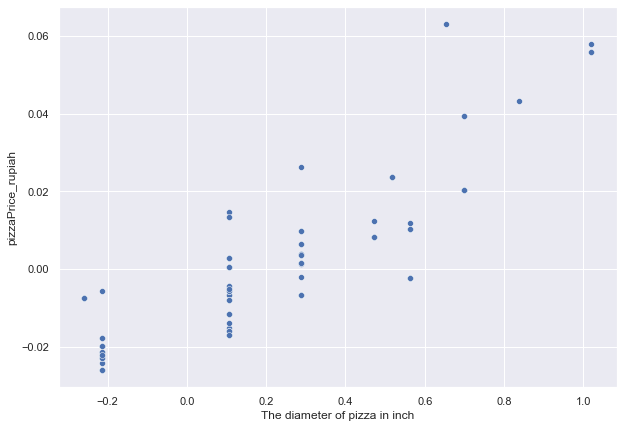

In [16]:
X1=np.array(X)
plt.figure(figsize=(10, 7))
sns.scatterplot(X1[:,0], X1[:, 1])
plt.xlabel('The diameter of pizza in inch')
plt.ylabel('pizzaPrice_rupiah')

In [17]:
def make_plot(X,centroids, cluster):
    X1=np.array(X)
    centroids=np.array(centroids)
    plt.figure(figsize=(10, 7))
    scat = sns.scatterplot(X1[:,0], X1[:, 1], hue=cluster)
    sns.scatterplot(centroids[:,0], centroids[:, 1], s=250,marker='*', color='g')
    for index,coordinate in enumerate(centroids):
        plt.text(coordinate[0]+0.03, coordinate[1]+0.02,index)
    plt.xlabel('The diameter of pizza in inch')
    plt.ylabel('pizzaPrice_rupiah')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

In [11]:
def calculate_cost(X, centroids, cluster):
    sum = 0
    for i, val in enumerate(X):
        sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
    return sum
def elbow_method(X,centroids, cluster,amount_cl,method):
    cost_list = []
    for k in range(1, amount_cl+1):
        centroids, cluster = method(X, k)
        cost = calculate_cost(X, np.array(centroids), np.array(cluster))
        cost_list.append(cost)
    sns.lineplot(x=range(1, amount_cl+1), y=cost_list, marker='o')
    plt.xlabel('k')
    plt.ylabel('WCSS')
    plt.show()

In [12]:
k=m.floor(m.sqrt(n/2))
k

7

In [37]:
def kmeans(X, k):
    diff = 1
    cluster = np.zeros(len(X))
    centroids = []
    for i in range(k):
        centroids.append([random.uniform(-1,1.1),random.uniform(-0.5,0.5)])
    while diff:
        for i, row in enumerate(X):
            mn_dist = float('inf')
            for idx, centroid in enumerate(centroids):
                d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx
        new_centroids = centroids.copy()
        for i in range(k):
            temp=[]
            for index, cl in enumerate(cluster):
                if cl == i:
                    temp.append(X[index])
            if temp!=[]:
                x=0
                y=0
                for row in temp:
                    x+=row[0]
                    y+=row[1]
                new_centroids[i]=[x/len(temp),y/len(temp)]
        if np.count_nonzero(np.array(centroids)-np.array(new_centroids)) == 0:
            diff = 0
        else:            
            centroids = new_centroids
    return centroids, cluster

Центроиды: [[0.167671530250042, -0.00321371574747474], [-0.22217490196671583, -0.018850831826252835], [-0.8664069350543233, -0.3733112681010049], [0.5086193578174019, -0.33295314570376744], [-0.6560946116058695, 0.4808052876800393], [0.1357532247704678, -0.2690113052221178], [0.6315028587526611, 0.02176317189305995]]
Распределение по кластерам [6. 6. 6. 0. 6. 6. 6. 1. 0. 0. 6. 6. 1. 0. 0. 6. 6. 1. 0. 0. 6. 6. 0. 6.
 6. 1. 0. 0. 0. 6. 0. 1. 0. 0. 0. 6. 0. 1. 0. 0. 0. 6. 0. 1. 0. 0. 0. 6.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 6. 6. 1. 0. 0. 6. 6. 0. 6. 6. 1. 0. 0. 0. 6. 0. 1.
 0. 0. 0. 6. 1. 0. 0. 0. 6. 0. 1. 0. 0. 0. 6. 0. 1. 0. 0. 0.]


C:\Users\snt_a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\snt_a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


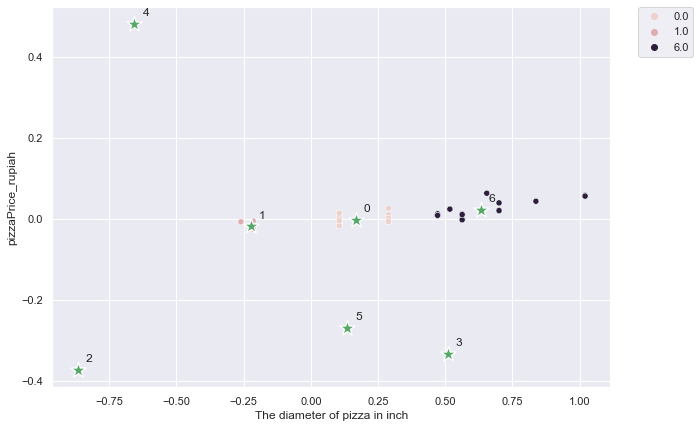

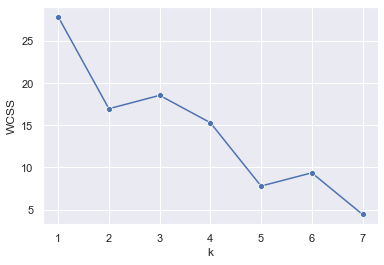

In [38]:
centroids, cluster = kmeans(X,k)
print('Центроиды:',centroids)
print('Распределение по кластерам',cluster)
make_plot(X,centroids, cluster)
elbow_method(X,centroids, cluster,k,kmeans)

In [39]:
def kmedians(X, k):
    diff = 1
    cluster = np.zeros(len(X))
    centroids = []
    for i in range(k):
        centroids.append([random.uniform(-1,1.1),random.uniform(-0.5,0.5)])
    while diff:
        for i, row in enumerate(X):
            mn_dist = float('inf')
            for idx, centroid in enumerate(centroids):
                d = abs(centroid[0]-row[0]) + abs(centroid[1]-row[1])
                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx
        new_centroids = centroids.copy()
        for i in range(k):
            temp=[]
            for index, cl in enumerate(cluster):
                if cl == i:
                    temp.append(X[index])
            if temp!=[]:
                temp=np.array(temp)
                new_centroids[i]=[st.median(temp[:,0]),st.median(temp[:,1])]
        if np.count_nonzero(np.array(centroids)-np.array(new_centroids)) == 0:
            diff = 0
        else:            
            centroids = new_centroids
    return centroids, cluster

Центроиды: [[-0.8365784720462356, -0.43957297976357235], [-0.25993945948398756, -0.007546341080521549], [0.10578046594643241, -0.004373150695754871], [-0.21422446880518503, -0.022222346610067435], [-0.8908825449246033, -0.3809473120428377], [0.5629303727344573, 0.02021907478618688], [-0.39615117086335006, 0.3732484079153432]]
Распределение по кластерам [5. 5. 5. 2. 5. 5. 5. 1. 2. 2. 5. 5. 1. 2. 2. 5. 5. 1. 2. 2. 5. 5. 2. 5.
 5. 3. 2. 2. 2. 5. 2. 3. 2. 2. 2. 5. 2. 3. 2. 2. 2. 5. 2. 3. 2. 2. 2. 5.
 2. 3. 2. 2. 3. 2. 2. 3. 2. 2. 3. 2. 2. 3. 2. 2. 3. 2. 2. 3. 2. 2. 3. 2.
 2. 3. 2. 2. 3. 2. 2. 5. 5. 1. 2. 2. 5. 5. 2. 5. 5. 3. 2. 2. 2. 5. 2. 3.
 2. 2. 2. 5. 3. 2. 2. 2. 5. 2. 3. 2. 2. 2. 5. 2. 3. 2. 2. 2.]


C:\Users\snt_a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\snt_a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


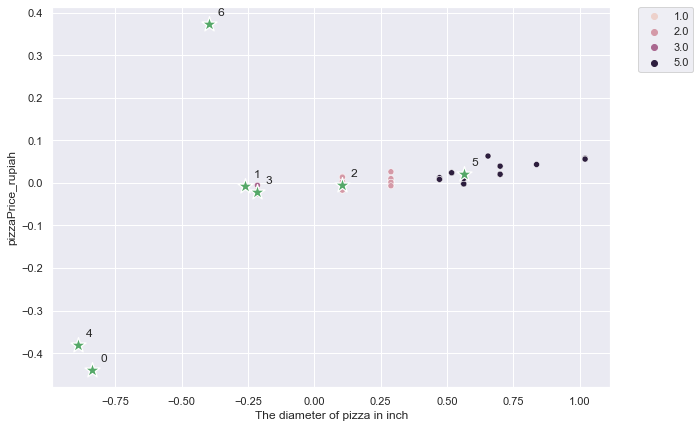

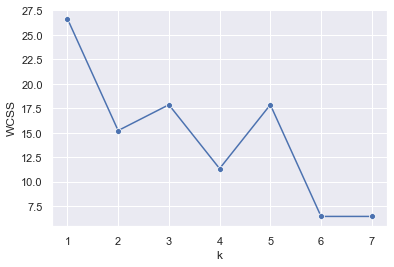

In [40]:
centroids1, cluster1=kmedians(X,k)
print('Центроиды:',centroids1)
print('Распределение по кластерам',cluster1)
make_plot(X,centroids1, cluster1)
elbow_method(X,centroids1, cluster1,k,kmedians)

In [23]:
def euclid_dist(x,y):
    return np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)
def manhat_dist(x,y):
    return abs(x[0]-y[0]) + abs(x[1]-y[1])

In [24]:
def estimate_quality(clusters, centroids, dist):
    f=0
    for cluster, centroid in zip(clusters,centroids):
        count=0
        if cluster!=0:
            for x in cluster:
                count+=dist(x,centroid)
            f+=len(cluster)*count
    return f/n

In [25]:
def transf_cluster(X,clusters):
    new_clusters={}
    for x,index_cluster in zip(X,clusters):
        new_clusters.setdefault(int(index_cluster),[])
        new_clusters[int(index_cluster)].append(x)
    new = [0]*k
    for key, value in new_clusters.items():
        new[key] = value
    return newF

In [41]:
new_cluster=transf_cluster(X, cluster)
print('Оценка качества разбиения для K-Means:',estimate_quality(new_cluster,centroids,euclid_dist))
new_cluster=transf_cluster(X, cluster1)
print('Оценка качества разбиения для K-Medians:',estimate_quality(new_cluster,centroids1,manhat_dist))

Оценка качества разбиения для K-Means: 3.920238436593448
Оценка качества разбиения для K-Medians: 3.372806631574742


In [27]:
new_cluster

[0,
 0,
 0,
 0,
 [[1.0200802795224821, 0.05790071060529118],
  [0.8372203168072723, 0.043224705075745294],
  [0.47150039137685235, 0.012286098824270187],
  [0.28864042866164236, 0.026168806757624404],
  [0.6543603540920623, 0.06305714498053704],
  [0.7000753447708647, 0.02021907478618688],
  [0.47150039137685235, 0.00831961084331184],
  [-0.25993945948398756, -0.007546341080521549],
  [0.10578046594643241, 0.00038663488139514514],
  [0.10578046594643241, 0.00038663488139514514],
  [0.7000753447708647, 0.02021907478618688],
  [0.47150039137685235, 0.00831961084331184],
  [-0.25993945948398756, -0.007546341080521549],
  [0.10578046594643241, 0.00038663488139514514],
  [0.10578046594643241, 0.00038663488139514514],
  [0.7000753447708647, 0.02021907478618688],
  [0.47150039137685235, 0.00831961084331184],
  [-0.25993945948398756, -0.007546341080521549],
  [0.10578046594643241, 0.00038663488139514514],
  [0.10578046594643241, 0.00038663488139514514],
  [1.0200802795224821, 0.055917466614812